In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
results_path = os.path.join(os.environ['HOME'],
                            'fits/uoineuro/cur/cur.h5')

In [3]:
results = h5py.File(results_path, 'r')
monkeys = list(results)
n_monkeys = len(monkeys)

In [4]:
[results[monkey]['decoding_x_cur'].shape for monkey in monkeys]

[(135, 5),
 (145, 5),
 (146, 5),
 (163, 5),
 (164, 5),
 (168, 5),
 (214, 5),
 (229, 5)]

# Number of columns

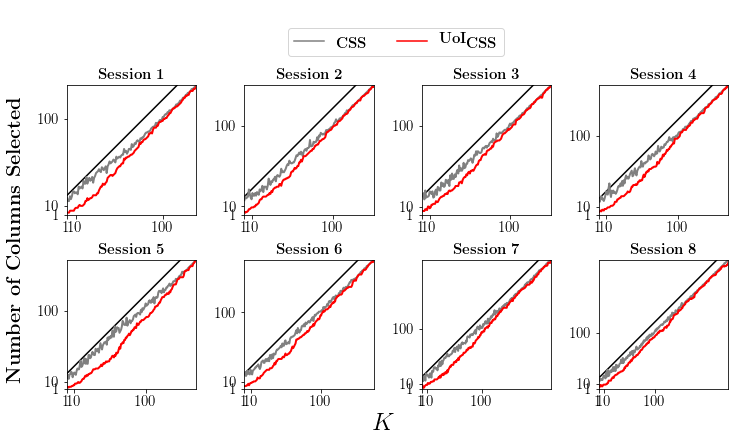

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for idx, monkey in enumerate(monkeys):
    ax = axes.ravel()[idx]
    n_columns_cur = results[monkey]['n_columns_cur'][:]
    n_columns_uoi = results[monkey]['n_columns_uoi'][:]
    
    x = np.arange(1, n_columns_cur.size + 1)
    ax.plot(x, x + 20, color='k', linewidth=1.5)
    ax.plot(x, n_columns_cur, color='gray', linewidth=2)
    ax.plot(x, n_columns_uoi, color='red', linewidth=2)
    ax.set_xlim([1, x.size])
    ax.set_ylim([1, x.size])
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_aspect('equal')
    ax.set_xticks([1, 10, 100])
    ax.set_yticks([1, 10, 100])
    ax.tick_params(labelsize=15)
    ax.set_title(r'\textbf{Session %s}' %str(idx+1), fontsize=15)

fig.text(
    x=0.5, y=-0.01, s=r'$K$', fontsize=25,
    horizontalalignment='center',
    verticalalignment='center'
)

fig.text(
    x=-0.01, y=0.5, s=r'\textbf{Number of Columns Selected}', fontsize=20,
    horizontalalignment='center',
    verticalalignment='center',
    rotation=90
)

ax.plot([], [], color='gray', label=r'\textbf{CSS}')
ax.plot([], [], color='r', label=r'\textbf{UoI}$_{\textbf{CSS}}$')

fig.legend(
    loc='lower center',
    ncol=2,
    bbox_to_anchor=(0.55, 1.05),
    prop={'size': 15}
)
plt.tight_layout()
#plt.savefig('css_nhp_n_columns.pdf', bbox_inches='tight')

# Reconstruction Error

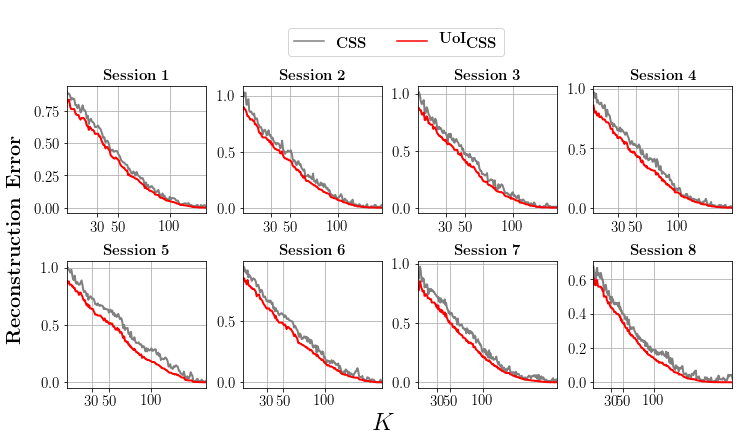

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for idx, monkey in enumerate(monkeys):
    ax = axes.ravel()[idx]
    reconstruction_cur = results[monkey]['reconstruction_cur'][:]
    reconstruction_uoi = results[monkey]['reconstruction_uoi'][:]
    
    x = np.arange(1, reconstruction_cur.size + 1)
    ax.plot(x, reconstruction_cur, color='gray', linewidth=2)
    ax.plot(x, reconstruction_uoi, color='red', linewidth=2)
    #ax.set_xscale('log')
    ax.set_xlim([1, x.size])
    ax.set_xticks([30, 50, 100])
    ax.tick_params(labelsize=15)
    ax.grid('on')
    ax.set_title(r'\textbf{Session %s}' %str(idx+1), fontsize=15)

fig.text(
    x=0.5, y=-0.01, s=r'$K$', fontsize=25,
    horizontalalignment='center',
    verticalalignment='center'
)

fig.text(
    x=-0.01, y=0.5, s=r'\textbf{Reconstruction Error}', fontsize=20,
    horizontalalignment='center',
    verticalalignment='center',
    rotation=90
)

ax.plot([], [], color='gray', label=r'\textbf{CSS}')
ax.plot([], [], color='r', label=r'\textbf{UoI}$_{\textbf{CSS}}$')

fig.legend(
    loc='lower center',
    ncol=2,
    bbox_to_anchor=(0.55, 1.05),
    prop={'size': 15}
)
plt.tight_layout()
#plt.savefig('css_nhp_reconstruction_err.pdf', bbox_inches='tight')

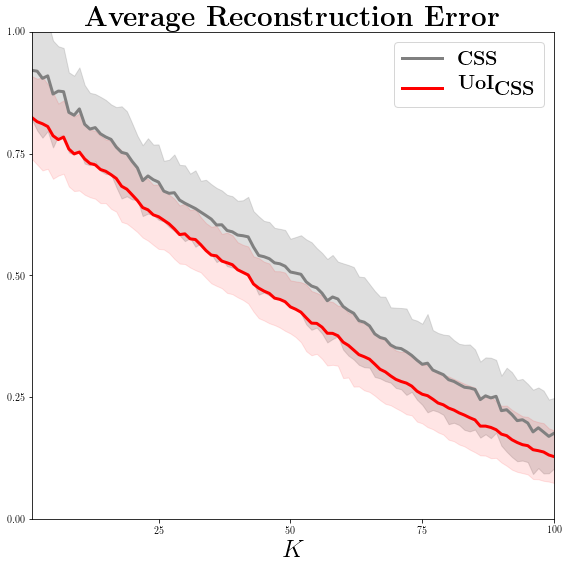

In [9]:
subset = 100
reconstruction_uois = np.zeros((n_monkeys, subset))
reconstruction_curs = np.zeros((n_monkeys, subset))

for idx, monkey in enumerate(monkeys):
    reconstruction_curs[idx] = results[monkey]['reconstruction_cur'][:subset]
    reconstruction_uois[idx] = results[monkey]['reconstruction_uoi'][:subset]
    
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

mean_reconstruction_uoi = np.mean(reconstruction_uois, axis=0)
std_reconstruction_uoi = np.std(reconstruction_uois, axis=0)
mean_reconstruction_cur = np.mean(reconstruction_curs, axis=0)
std_reconstruction_cur = np.std(reconstruction_curs, axis=0)

ax.plot(np.arange(1, subset+1), np.mean(reconstruction_curs, axis=0), color='gray', linewidth=3, label=r'\textbf{CSS}')
ax.plot(np.arange(1, subset+1), np.mean(reconstruction_uois, axis=0), color='r', linewidth=3, label=r'\textbf{UoI}$_{\textbf{CSS}}$')
ax.fill_between(
    np.arange(1, subset+1),
    y1=mean_reconstruction_cur - std_reconstruction_cur,
    y2=mean_reconstruction_cur + std_reconstruction_cur,
    color='gray',
    alpha=0.25
)

ax.fill_between(
    np.arange(1, subset+1),
    y1=mean_reconstruction_uoi - std_reconstruction_uoi,
    y2=mean_reconstruction_uoi + std_reconstruction_uoi,
    color='r',
    alpha=0.1
)

ax.set_xlim([1, subset])
ax.set_ylim([0, 1.0])
ax.set_xticks([25, 50, 75, 100])
ax.set_yticks([0., 0.25, 0.50, 0.75, 1.0])
ax.set_xlabel(r'$K$', fontsize=25)
ax.set_title(r'\textbf{Average Reconstruction Error}', fontsize=28)
ax.legend(
    loc=0,
    prop={'size': 20}
)

plt.tight_layout()
#plt.savefig('css_nhp_average_reconstruction_err.pdf', bbox_inches='tight')

# Mean Decoding Accuracy

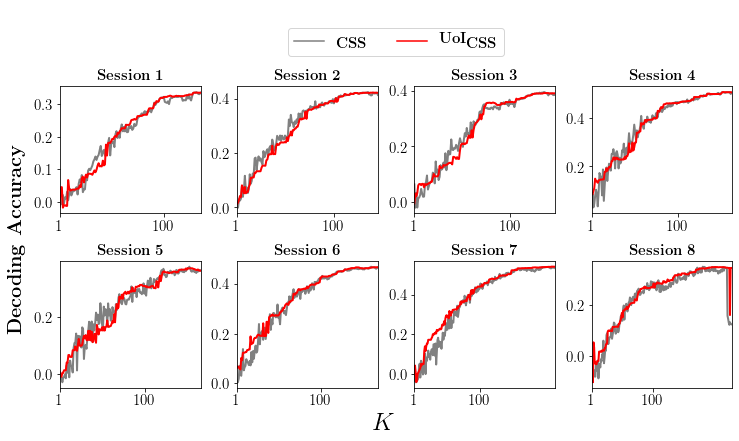

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for idx, monkey in enumerate(monkeys):
    ax = axes.ravel()[idx]
    decoding_cur = np.median((results[monkey]['decoding_x_cur'][:] + results[monkey]['decoding_y_cur'][:]) / 2., axis=1)
    decoding_uoi = np.median((results[monkey]['decoding_x_uoi'][:] + results[monkey]['decoding_y_uoi'][:]) / 2., axis=1)
    
    if idx == 7:
        x = np.arange(1, decoding_cur.size + 1)
        ax.plot(x[:-2], decoding_cur[:-2], color='gray', linewidth=2)
        ax.plot(x[:-2], decoding_uoi[:-2], color='red', linewidth=2)
    else:
        x = np.arange(1, decoding_cur.size + 1)
        ax.plot(x, decoding_cur, color='gray', linewidth=2)
        ax.plot(x, decoding_uoi, color='red', linewidth=2)
    ax.set_xlim([1, x.size])
    ax.set_xticks([1, 100])
    ax.tick_params(labelsize=15)
    ax.set_title(r'\textbf{Session %s}' %str(idx+1), fontsize=15)

fig.text(
    x=0.5, y=-0.01, s=r'$K$', fontsize=25,
    horizontalalignment='center',
    verticalalignment='center'
)

fig.text(
    x=-0.01, y=0.5, s=r'\textbf{Decoding Accuracy}', fontsize=20,
    horizontalalignment='center',
    verticalalignment='center',
    rotation=90
)

ax.plot([], [], color='gray', label=r'\textbf{CSS}')
ax.plot([], [], color='r', label=r'\textbf{UoI}$_{\textbf{CSS}}$')

fig.legend(
    loc='lower center',
    ncol=2,
    bbox_to_anchor=(0.55, 1.05),
    prop={'size': 15}
)
plt.tight_layout()
#plt.savefig('css_nhp_decoding.pdf', bbox_inches='tight')

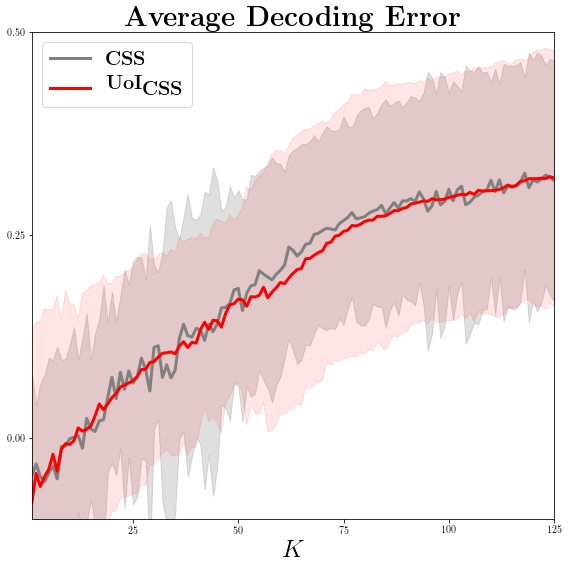

In [12]:
subset = 125
decoding_curs = np.zeros((n_monkeys, subset))
decoding_uois = np.zeros((n_monkeys, subset))

for idx, monkey in enumerate(monkeys):
    decoding_curs[idx] = np.mean((results[monkey]['decoding_x_cur'][:subset] + results[monkey]['decoding_y_cur'][:subset]) / 2., axis=1)
    decoding_uois[idx] = np.mean((results[monkey]['decoding_x_uoi'][:subset] + results[monkey]['decoding_y_uoi'][:subset]) / 2., axis=1)
    
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

mean_decoding_uoi = np.mean(decoding_uois, axis=0)
std_decoding_uoi = np.std(decoding_uois, axis=0)
mean_decoding_cur = np.mean(decoding_curs, axis=0)
std_decoding_cur = np.std(decoding_curs, axis=0)

ax.plot(np.arange(1, subset+1), mean_decoding_cur, color='gray', linewidth=3, label=r'\textbf{CSS}')
ax.plot(np.arange(1, subset+1), mean_decoding_uoi, color='r', linewidth=3, label=r'\textbf{UoI}$_{\textbf{CSS}}$')
ax.fill_between(
    np.arange(1, subset+1),
    y1=mean_decoding_cur - std_decoding_cur,
    y2=mean_decoding_cur + std_decoding_cur,
    color='gray',
    alpha=0.25
)

ax.fill_between(
    np.arange(1, subset+1),
    y1=mean_decoding_uoi - std_decoding_uoi,
    y2=mean_decoding_uoi + std_decoding_uoi,
    color='r',
    alpha=0.1
)

ax.set_xlim([1, subset])
ax.set_ylim([-0.1, 0.5])
ax.set_xticks([25, 50, 75, 100, 125])
ax.set_yticks([0., 0.25, 0.5])
ax.set_xlabel(r'$K$', fontsize=25)
ax.set_title(r'\textbf{Average Decoding Error}', fontsize=28)
ax.legend(
    loc=2,
    prop={'size': 20}
)

plt.tight_layout()
#plt.savefig('css_nhp_average_decoding.pdf', bbox_inches='tight')